In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [1]:
ds = pd.read_csv("survey.csv")
#ds.head(15)

NameError: name 'pd' is not defined

## Define mental health problems:

In [4]:
# what are the persons with mental health problems?
#if the person look for treatment shows that the person have mental problems
ds["mental problem"] = ds["treatment"] =="Yes" 


## Define genders:


In [2]:
#if there is a correlation between working for a tech company and having mental problems.
#This code creates 3 new tables, Female, Male and other:
ds["Gender"].unique()
ds["Female"] = ds['Gender'].str.startswith("F" or "f" or "W" or "w")
#ds["Female"]

ds["Male"] = ds['Gender'].str.startswith("M" or "m")
ds["Male"]

ds["other_gender"] = ds["Gender"].str.startswith(not "F" or "f" or "W" or "w" or "M" or "m")
#ds["other_gender"]

NameError: name 'ds' is not defined

In [6]:
#What is the percentage of males/females with mental problems:

#1) Define inside every category which are the percentage of male, female and other with mental problems:
def match_M(row):
    if (row['Male'] == True) and (row['mental problem'] == True):
        val = 1
    else:
        val = 0
    return val

def match_F(row):
    if (row['Female'] == True) and (row['mental problem'] == True):
        val = 1
    else:
        val = 0
    return val

def match_O(row):
    if (row['other_gender'] == True) and (row['mental problem'] == True):
        val = 1
    else:
        val = 0
    return val

ds['sk_male'] = ds.apply(match_M, axis=1)
ds['sk_female'] = ds.apply(match_F, axis=1)
ds['sk_other'] = ds.apply(match_O, axis=1)

total_doents = ds["mental problem"].sum()

sum_sk_male = ds["sk_male"].sum()
sum_sk_female = ds["sk_female"].sum()
sum_sk_other = ds["sk_other"].sum()

sum_sk_male

339

In [7]:
#2) Calculate the percentage of sick by genres:
percentage_males = sum_sk_male/total_doents
percentage_female = sum_sk_female/total_doents
percentage_other = ((total_doents-(sum_sk_male+sum_sk_female))/total_doents)

percentage_other


0.2904238618524333

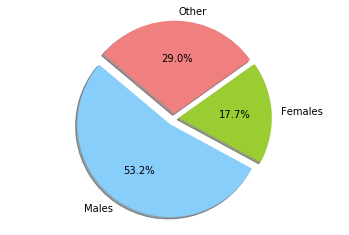

In [8]:
# Data to plot
labels = 'Males', 'Females', 'Other'
sizes = [percentage_males, percentage_female, percentage_other]
colors = ['lightskyblue', 'yellowgreen', 'lightcoral']
explode = (0.08, 0.05, 0.05)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Country

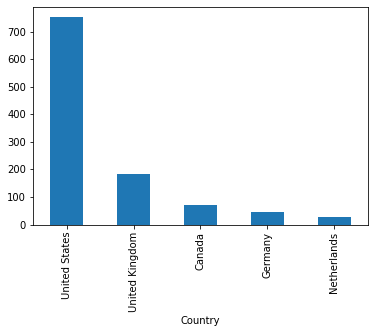

In [26]:
df1 = ds.pivot_table(values = "Timestamp" , index=["Country"], aggfunc='count')
df1 = df1.sort_values(by = "Timestamp", ascending = False)
df1[:5].plot.bar(legend = False)


## Ages

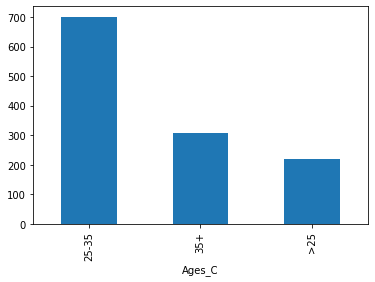

In [49]:
#Looking at the unique values is possible to observe that most ages are between the 25 to 60 years old so I decided to 
#divide in 3 category 
bins= [0, 25,35, 50]
labels =[">25","25-35", "35+" ]
ds["Ages_C"] = pd.cut(ds["Age"], include_lowest = False, bins = bins, labels = labels)

df2 = ds.pivot_table(values = "Timestamp" , index=["Ages_C"], aggfunc='count')
df2 = df2.sort_values(by = "Timestamp", ascending = False)
df2.plot.bar(legend = False)


## Age vs Mental Health Problem

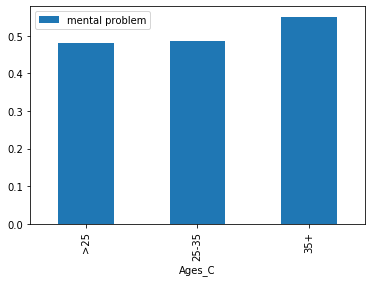

In [64]:
df3 = ds.pivot_table(values = ["mental problem"], index=["Ages_C"], aggfunc='mean')
df3.plot.bar()

## Self employee vs Mental Health Problem

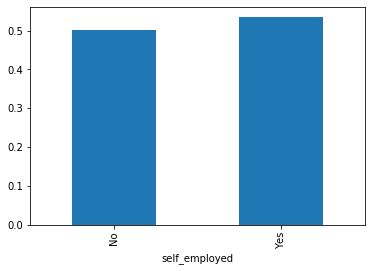

In [68]:
df5 =ds.pivot_table(values = "mental problem" , index=["self_employed"], aggfunc='mean')
df5.plot.bar(legend = False)

In [61]:
df3 = ds.pivot_table(index=["Ages_C"], columns = ["mental problem"], aggfunc='mean')
df3

Age               Female                Male            \
mental problem      False      True      False     True      False     True    
Ages_C                                                                         
>25             22.754386  23.084906  0.105263  0.207547  0.666667  0.566038   
25-35           30.225000  30.472141  0.077778  0.193548  0.641667  0.498534   
35+             40.268116  40.319527  0.086957  0.142012  0.673913  0.568047   

               other_gender           sk_female           sk_male            \
mental problem        False     True      False     True    False     True    
Ages_C                                                                        
>25                0.035088  0.113208       0.0  0.207547     0.0  0.566038   
25-35              0.041667  0.093842       0.0  0.193548     0.0  0.498534   
35+                0.021739  0.071006       0.0  0.142012     0.0  0.568047   

               sk_other           tech_sk            
mental problem    False     True    False     True   
Ages_C                                               
>25                 0.0  0.113208     0.0  0.820755  
25-35               0.0  0.093842     0.0  0.829912  
35+                 0.0  0.071006     0.0  0.751479

## Tech job vs mental problem

In [54]:
#Is there a correlation between working for a tech company and having mental problems?

#1) Define the rows with people with mental problems and that work on a tech company:
def match_T(row):
    if (row['tech_company'] == "Yes") and (row['mental problem'] == True):
        val = 1
    else:
        val = 0
    return val

ds["tech_sk"] = ds.apply(match_T, axis=1)
sum_tech_sk = ds["tech_sk"].sum()

#2) Calculate the percentage of persons that work on a tech company that have mental problems:
percentage_tech_sk = sum_tech_sk/total_doents * 100
percetage_nontech_sk = 100 - percentage_tech_sk 
percentage_tech_sk

ds.corr()

,Age,mental problem,Female,Male,other_gender,sk_male,sk_female,sk_other,tech_sk
Age,1.000000,0.027860,-0.010949,-0.033943,-0.007295,-0.017115,-0.008853,-0.006083,0.033943
mental problem,0.027860,1.000000,0.138958,-0.122624,0.105008,0.599834,0.310293,0.213200,0.820784
Female,-0.010949,0.138958,1.000000,-0.467552,-0.100486,-0.235743,0.808563,-0.083790,0.108401
Male,-0.033943,-0.122624,-0.467552,1.000000,-0.311508,0.504208,-0.378045,-0.259751,-0.072838
other_gender,-0.007295,0.105008,-0.100486,-0.311508,1.000000,-0.157065,-0.081249,0.833851,0.044962
sk_male,-0.017115,0.599834,-0.235743,0.504208,-0.157065,1.000000,-0.190613,-0.130969,0.523149
sk_female,-0.008853,0.310293,0.808563,-0.378045,-0.081249,-0.190613,1.000000,-0.067750,0.248009
sk_other,-0.006083,0.213200,-0.083790,-0.259751,0.833851,-0.130969,-0.067750,1.000000,0.126495
tech_sk,0.033943,0.820784,0.108401,-0.072838,0.044962,0.523149,0.248009,0.126495,1.000000


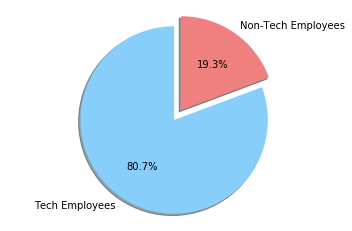

In [53]:
labels = 'Tech Employees', 'Non-Tech Employees'
sizes = [percentage_tech_sk, percetage_nontech_sk ]
colors = ['lightskyblue', 'lightcoral']
explode = (0.08, 0.05)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()

## Is gender a factor that influences the perception on mental health?

In [71]:
#there are genders differences between the aprproching mental health.
#1) Define the rows with people with males and negative perception on talking about mental health on the job:
def match_MP(row):
    if (row['Male'] == True) and (row['work_interfere'] == "Often" or "Sometimes"):
        val = 1
    else:
        val = 0
    return val

Total_responses = ds["Gender"].count()

ds["male_n_perc"] = ds.apply(match_MP, axis=1)
sum_male_n_perc = ds["male_n_perc"].sum()


#2) Define the rows with people with female and negative perception on talking about mental health on the job:
def match_FP(row):
    if (row['Female'] == True) and (row['work_interfere'] == "Often" or "Sometimes"):
        val = 1
    else:
        val = 0
    return val

ds["female_n_perc"] = ds.apply(match_FP, axis=1)
sum_female_n_perc = ds["female_n_perc"].sum()


#3) Define the rows with people with other and negative perception on talking about mental health on the job:
def match_OP(row):
    if (row['other_gender'] == True) and (row['work_interfere'] == "Often" or "Sometimes"):
        val = 1
    else:
        val = 0
    return val

ds["other_n_perc"] = ds.apply(match_OP, axis=1)
sum_other_n_perc = ds["other_n_perc"].sum()

#3) Calculate the percentage:
percentage_male_n_perc = sum_male_n_perc/Total_responses * 100
print("Males", percentage_male_n_perc)
percentage_female_n_perc = sum_female_n_perc/Total_responses * 100
print("Female", percentage_female_n_perc)
percentage_other_n_perc = 100 - (percentage_female_n_perc+percentage_male_n_perc)
print("Other", percentage_other_n_perc)




Males 59.17394757744241
Female 13.105639396346305
Other 27.720413026211276


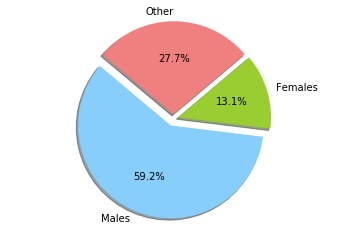

In [73]:
labels = 'Males', 'Females', 'Other'
sizes = [percentage_male_n_perc, percentage_female_n_perc, percentage_other_n_perc]
colors = ['lightskyblue', 'yellowgreen', 'lightcoral']
explode = (0.08, 0.05, 0.05)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()